# 데이터 시각화

## 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 한글 폰트 선언
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [2]:
from delivery_data import get_dataframe as get_delivery

delivery = get_delivery('2019', '08-01', '08-30', 'original_data/')
delivery = delivery.reset_index()

In [3]:
delivery

,date,sum,bossam,bunsik,chicken,cnfood,dessert,dosirak,fastfood,jpfood,krfood,pizza,sashimi,simburum,tang,wsfood
0,08-01,3810,294,541,1010,67,314,30,398,166,403,154,52,0.0,60,182
1,08-02,4363,345,545,1272,67,404,30,459,183,469,135,65,0.0,91,160
2,08-03,5473,463,712,1435,135,456,28,478,231,698,202,105,0.0,133,216
3,08-04,5748,473,693,1331,102,708,11,584,259,725,280,56,0.0,147,253
4,08-05,4411,258,559,991,73,947,42,414,180,447,150,43,0.0,63,115
5,08-06,4340,264,630,997,28,824,31,402,198,424,191,57,0.0,74,130
6,08-07,4267,250,502,937,79,999,34,416,148,354,153,47,0.0,75,151
7,08-08,4383,244,540,971,55,1123,38,409,140,369,158,36,0.0,73,146
8,08-09,5951,349,547,1415,69,1841,36,465,185,447,181,49,0.0,96,160
9,08-10,5445,448,663,1490,132,557,25,512,213,640,219,85,0.0,113,209


In [6]:
from delivery_data import detach_month

delivery_day = detach_month(delivery)

In [7]:
delivery_day

## 총주문횟수에 대한 막대그래프
- [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [seaborn 막대 그래프](https://hleecaster.com/python-seaborn-barplot/)

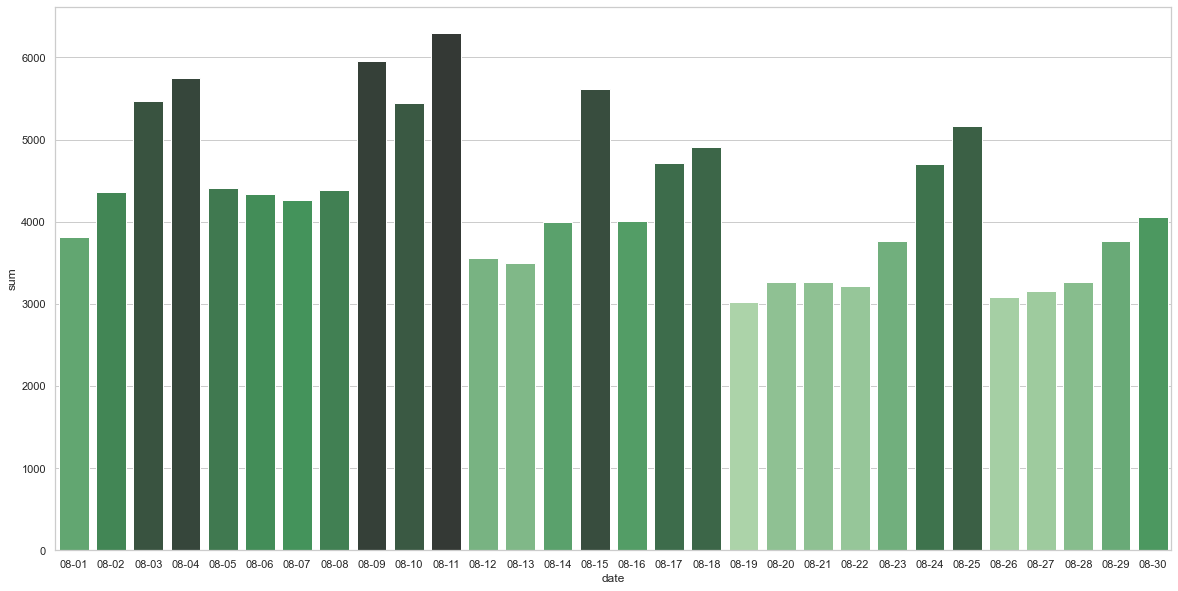

In [8]:
plt.figure(figsize = (20, 10))

sns.set(style="whitegrid", color_codes=True)

sum_ax = sns.barplot(data=delivery, x="date", y="sum", palette="Greens_d", hue="sum", dodge=False)
sum_ax.legend_.remove()

# plt.savefig('sum_ax.png', dpi=300)
plt.show()

## 분류 별 주문횟수에 대한 막대그래프
- [Multi-plot grid in Seaborn](https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/)
- [matplotlib.pyplot.subplots](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplots.html)
- [matplotlib colormaps](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)
- [Matplotlib의 이해](https://wikidocs.net/14604)

In [ ]:
delivery_categories = delivery.columns.tolist()
delivery_categories = delivery_categories[2:] + delivery_categories[:2]
delivery_array = np.array(delivery_categories).reshape(4, -1)

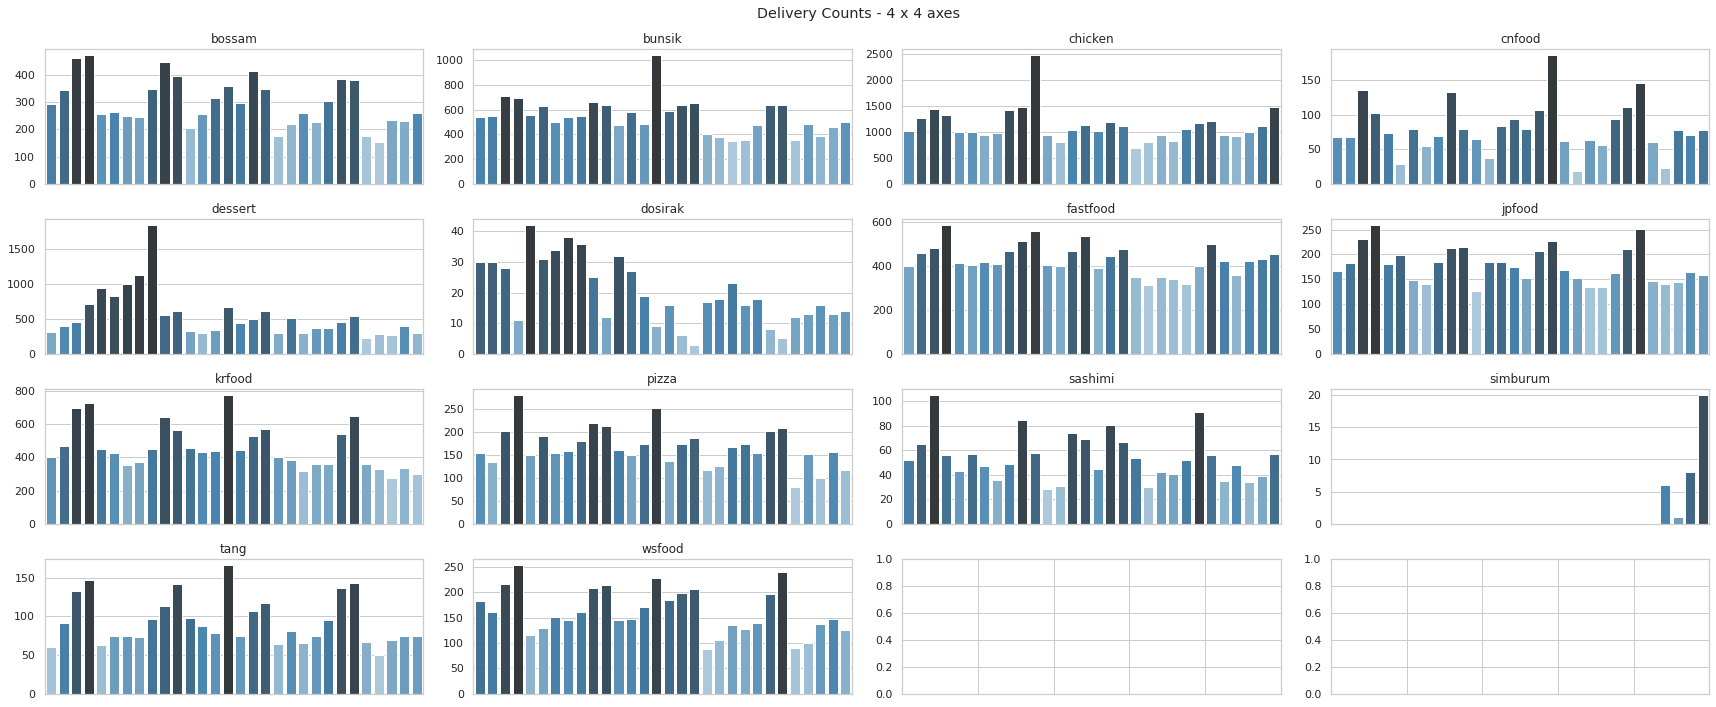

In [ ]:
delivery_fig, delivery_axes = plt.subplots(4, 4, figsize=(24,10))
delivery_fig.suptitle('Delivery Counts - 4 x 4 axes')

for i in range(4):
    for j in range(4):
        ax = delivery_axes[i, j]
        food = str(delivery_array[i, j])

        if food in {'date', 'sum'}:
            break

        sns.barplot(ax=ax, data=delivery_day, x='date', y=food, \
                    palette='Blues_d', hue=food, dodge=False)
        ax.set(title=food, xlabel=None, ylabel=None, xticklabels=[])
        ax.legend_.remove()

delivery_axes[3, 2].set(xticklabels=[])
delivery_axes[3, 3].set(xticklabels=[])

plt.tight_layout()
plt.show()

# 테스트 코드

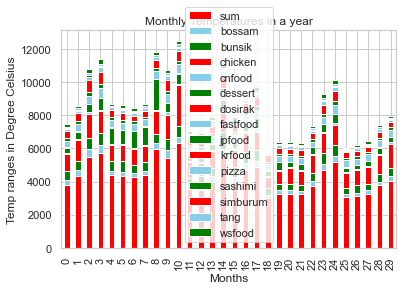

In [9]:
delivery.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
 
# plt
# plt.rcParams['font.family'] = '/usr/share/fonts/truetype/dejavu/BMDOHYEON.ttf'

# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')
 
# title of plot
plt.title('Monthly Temperatures in a year')

plt.show()

In [ ]:
# import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
stacked_bar_data = pd.read_csv("C:\stacked_bar.csv")



stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aeda0379-ef07-4599-92da-f5608bf4c48d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>